Importing Dependencies

In [24]:
import kaggle as kg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [25]:

# Download the dataset
os.environ['KAGGLE_USERNAME'] = 'firrex'
os.environ['KAGGLE_KEY'] = 'ce0e7c23f4f3624c6b36e0c5733d845f'

kg.api.authenticate()


In [26]:
kg.api.dataset_download_files(dataset = "altruistdelhite04/gold-price-data", path='Gold Price Prediction\On-zip', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data


In [27]:
gold_data = pd.read_csv('Gold Price Prediction/On-zip/gld_price_data.csv')

In [28]:
#print the first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [30]:
#check for number of rows and columns
gold_data.shape

(2290, 6)

In [31]:
#check for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [32]:
#Gettig some basic statistics
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [33]:
#getting some basic statistics
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlations:
1. Positive Correlation
2. Negative Correlation

In [34]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
correlation = gold_data.corr()


Text(0.5, 1.0, 'Correlation Matrix')

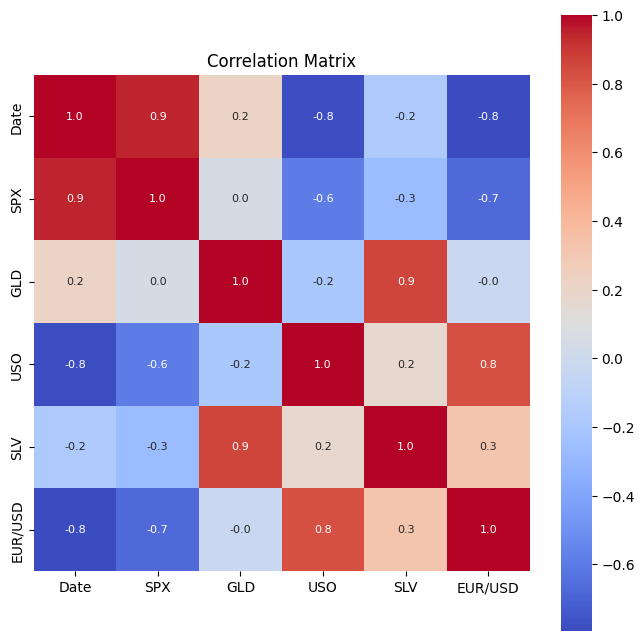

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square= True,annot=True,fmt='.1f'
            ,annot_kws={'size':8} , cmap='coolwarm')
plt.title('Correlation Matrix')

In [36]:
#correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


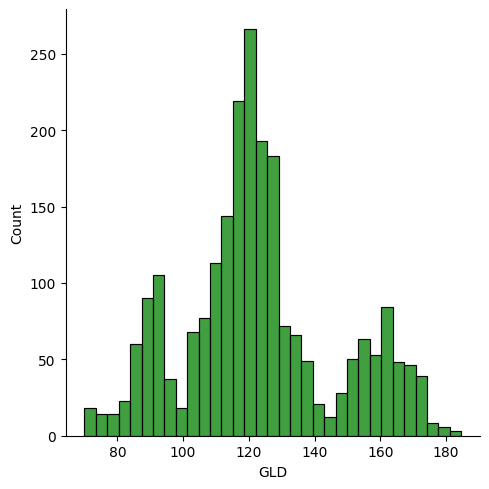

In [37]:
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [38]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [39]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Building:
Random Forest Regressor

In [41]:
regressor = RandomForestRegressor(n_estimators=100)

In [42]:
# Train the model with the converted target variable
regressor.fit(x_train, y_train)


RandomForestRegressor()

Model Evaluation:

In [43]:
test_data_prediction = regressor.predict(x_test)


In [46]:
print(test_data_prediction)

[168.59019928  81.88450001 116.14640013 127.65530042 120.60560115
 154.69269776 150.50129847 126.15240057 117.33059895 125.86150117
 116.63190077 171.6962008  141.79769825 168.11189893 115.0518002
 117.8499006  140.04980284 170.09400074 159.63740333 158.4284
 155.25950084 125.4009003  175.8655988  158.32990282 125.19200061
  93.80659963  77.56460014 120.55130002 119.18789997 167.57949995
  88.45630029 125.10490042  91.18650063 117.69230033 121.12069966
 135.87540087 115.69610119 115.30860081 148.30989913 107.15640083
 104.4681027   86.98619778 126.46880006 117.99680019 153.00899892
 119.77710024 108.35359961 108.01399844  93.12580071 127.02749791
  74.38420054 113.62139934 121.64390037 111.21069871 118.78399866
 120.59999925 159.03690023 168.73390151 146.90269683  85.8142985
  94.53490042  86.80169891  90.52489998 118.84720064 126.31290087
 127.55849989 168.52049999 122.3725992  117.23159921  98.6217003
 167.88580186 142.99069816 132.48890244 121.17150205 121.06689965
 119.61740053 114

In [48]:
#R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889322755670178


Compare the Actual and Predicted Values

In [49]:
Y_test = list(y_test)


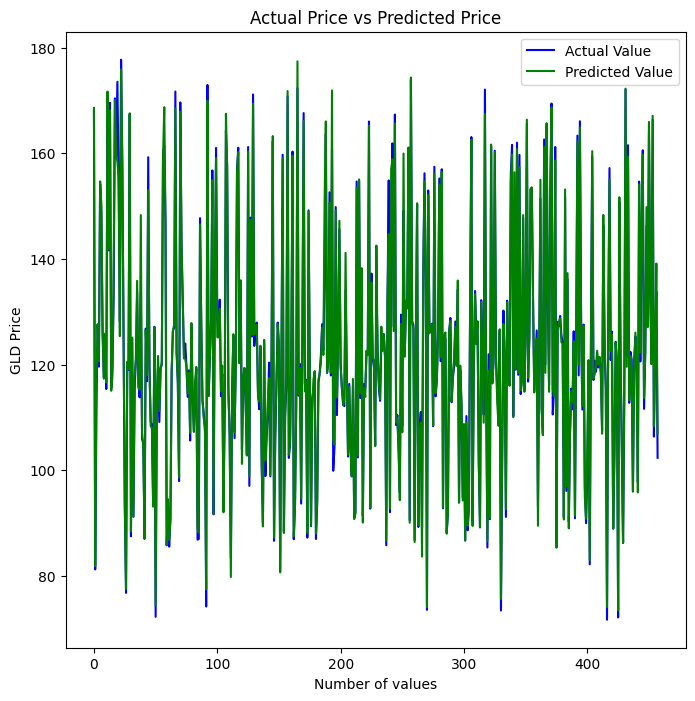

In [53]:
plt.figure(figsize=(8,8))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()